In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
data = pd.read_csv("../data/hrv/participant_15_merged.csv")

In [17]:
data.tail()

,timestamp,TEMP,HR,ACC_X,ACC_Y,ACC_Z,EDA,BVP,IBI,RMSSD,SDNN,PNN50
1050297,2020-08-05 20:33:23.500,31.75,117.62,-49.750,7.500,-40.625,6.219114,282.06625,0.546875,46.875,46.875,0.0
1050298,2020-08-05 20:33:23.750,31.75,117.62,-49.625,8.000,-40.000,6.239614,83.14250,0.546875,46.875,46.875,0.0
1050299,2020-08-05 20:33:24.000,31.75,117.83,-51.375,7.500,-38.500,6.239614,-138.16750,0.546875,46.875,46.875,0.0
1050300,2020-08-05 20:33:24.250,31.75,117.83,-52.125,8.375,-38.250,6.239614,-276.68200,0.546875,46.875,46.875,0.0
1050301,2020-08-05 20:33:24.500,31.75,117.83,-52.000,8.500,-38.500,6.239614,-276.68200,0.546875,46.875,46.875,0.0


In [35]:
# Step 1: Focus on a small time window for clarity
df_bvp_segment = data[
    (data['timestamp'] >= '2020-08-05 20:33:00') &
    (data['timestamp'] <= '2020-08-05 20:33:20')
]

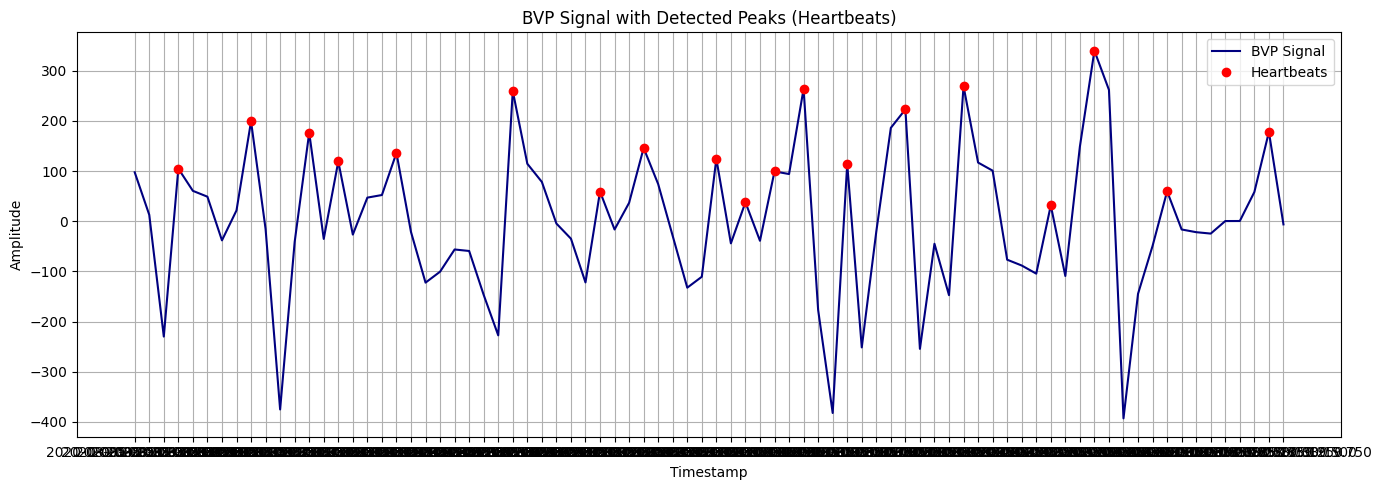

In [38]:


# Step 2: Detect peaks in BVP (tweak 'distance' based on sampling rate)
peaks, _ = find_peaks(df_bvp_segment['BVP'], distance=2, height=0.1)

# Step 3: Plot the BVP waveform with detected peaks
plt.figure(figsize=(14, 5))
plt.plot(df_bvp_segment['timestamp'], df_bvp_segment['BVP'], label='BVP Signal', color='navy')
plt.plot(df_bvp_segment['timestamp'].iloc[peaks], df_bvp_segment['BVP'].iloc[peaks], 'ro', label='Heartbeats')
plt.title("BVP Signal with Detected Peaks (Heartbeats)")
plt.xlabel("Timestamp")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
